#1. Install and Import Dependencies

In [ ]:
#Install Prophet
!pip install neuralprophet

In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt
import pickle

# 2. Read in and Process Data

In [ ]:
path = '/content/drive/MyDrive/weatherAUS.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [ ]:
#Let's explore our features
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
#Let's see how many locations we have
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
#Let's explore our data types for the features
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [ ]:
#Prophet requires the date as a datetime format
df['Date'] = pd.to_datetime(df['Date'])

#Confirm our date is datetime
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [ ]:
#We'll filter out a chosen location - Melbourne
melb = df[df['Location'] == 'Melbourne']

#Confirm we are working with Melbourne
melb.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,W,37.0,35.0,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,WSW,30.0,35.0,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,W,17.0,24.0,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,N,9.0,7.0,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,NNE,24.0,30.0,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No


In [ ]:
#Confirm all datatypes are correct
melb.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

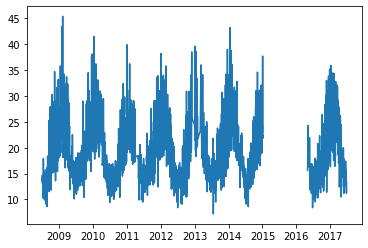

In [ ]:
#Let's explore temperature visually
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

<ipython-input-78-f4aeb30c07b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb['Year'] = melb['Date'].apply(lambda x: x.year)


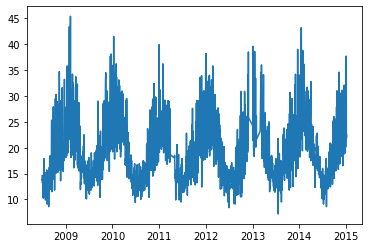

In [ ]:
#We are missing a chunk of data that cannot be reasonably imputed. Let's remove after 2015
#Extract the year into a new column
melb['Year'] = melb['Date'].apply(lambda x: x.year)
#Filter prior to end of 2015
melb = melb[melb['Year'] <= 2015]

#Confirm by visualizing
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

In [ ]:
#Select only dates and target
data = melb[['Date', 'Temp3pm']]
#Rename the columns
data.columns = ['ds', 'y']
#Drop remaining missing data
data.dropna(inplace = True)

data.head()


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6


# 3. Train Model

In [ ]:
#Instantiate model
model = NeuralProphet()

#Fit model, daily frequency
model.fit(data, freq = 'D', epochs = 1000)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("

Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,22.434923,27.952169,0.409797,0.0,0
1,21.275764,26.497108,0.378054,0.0,1
2,20.220104,25.252216,0.348288,0.0,2
3,19.152287,23.887741,0.319517,0.0,3
4,18.105667,22.699795,0.292270,0.0,4
...,...,...,...,...,...
995,3.016177,3.925640,0.010810,0.0,995
996,3.013945,3.915834,0.010794,0.0,996
997,3.017893,3.918571,0.010806,0.0,997
998,3.019612,3.939707,0.010875,0.0,998


# 4. Forecast and Evaluate

In [ ]:
#Create future periods
future = model.make_future_dataframe(data, periods = 1200)
#Forecast
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.917% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.917% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 72it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
#View future periods
future

,ds,y
0,2015-01-06,None
1,2015-01-07,None
2,2015-01-08,None
3,2015-01-09,None
4,2015-01-10,None
...,...,...
1195,2018-04-15,None
1196,2018-04-16,None
1197,2018-04-17,None
1198,2018-04-18,None


In [ ]:
#View forecast values
forecast.head()

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2015-01-06,None,25.879871,20.281096,5.308219,0.290557
1,2015-01-07,None,25.694248,20.281906,5.448238,-0.035898
2,2015-01-08,None,25.945602,20.282719,5.584281,0.078604
3,2015-01-09,None,26.035343,20.283531,5.715626,0.036187
4,2015-01-10,None,26.105671,20.284344,5.841588,-0.020261


In [ ]:
forecast.tail()

,ds,y,yhat1,trend,season_yearly,season_weekly
1195,2018-04-15,None,21.777464,21.251194,0.545404,-0.019133
1196,2018-04-16,None,21.310308,21.252005,0.388359,-0.330055
1197,2018-04-17,None,21.777695,21.252815,0.234321,0.290557
1198,2018-04-18,None,21.301365,21.253628,0.083634,-0.035898
1199,2018-04-19,None,21.269646,21.254440,-0.063398,0.078604


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


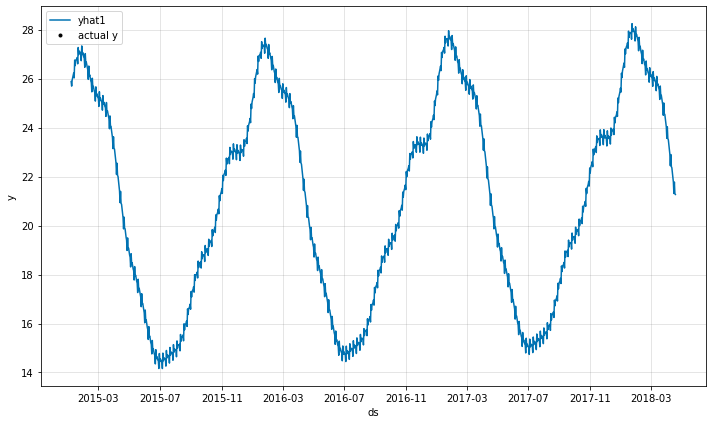

In [ ]:
#Visualize our forecast
plot1 = model.plot(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


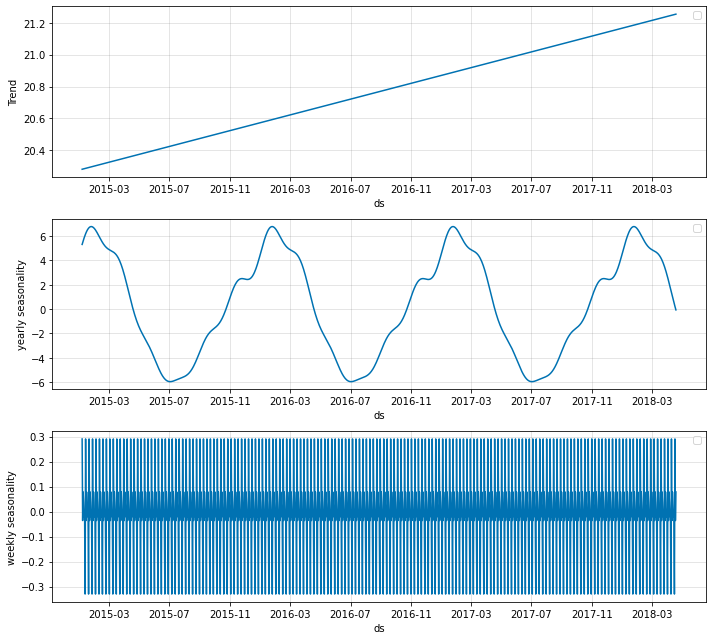

In [ ]:
#Visualize components
plot2 = model.plot_components(forecast)

# Save Model

In [ ]:
#Use pickle to save model (write binary)
with open('weather_forecast.pkkl', 'wb') as f:
  pickle.dump(model, f)

In [ ]:
#Use pickle to load model (read binaery)
#with open('weather_forecast.pkkl', 'rb') as f:
  #model = pickle.load(f)